# Home work 3 - ML Classifiers

 Comparing different classification models to predict a target class.


### _1. Read in this file. How many classes are there? How many features are there? Are there any missing entries?_

In [489]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [490]:
# read in file and use index column
df = pd.read_csv('classify_me.csv', index_col=0)
df.head()

,A,B,C,D,E,F,G,H,I,J,Target
0,0.150333,-1.468600,0.420842,-0.878333,-1.348358,0.686323,-0.663374,-2.301067,1.302455,0.320666,2
1,-1.632086,-0.705800,0.336495,0.024062,-0.493619,-1.534829,-0.024577,-0.296786,0.320047,0.506105,1
2,-1.285627,1.381077,-0.385668,1.446167,-0.348163,-2.255813,0.272703,-0.964729,-1.515589,0.454248,2
3,-0.012135,-0.729971,-1.132579,1.076787,1.235348,1.234472,-1.809369,0.735971,-1.349093,-0.061655,0
4,-1.303877,0.930213,0.801927,-1.750493,0.846840,-0.258996,-0.507816,0.560169,0.583438,-0.472208,0


In [491]:
# number of classes
len(pd.unique(df['Target']))

3

In [492]:
# double-check number of classes
df['Target'].unique()

array([2, 1, 0])

#### _&rarr; There are three classes in the target column, which we are trying to predict based on the features in the data set_

In [493]:
# number of features
features = df.loc[:, df.columns != 'Target']

In [494]:
cols = len(features.axes[1])
cols

10

#### _&rarr; There are ten features in the data set_

In [495]:
# check missing values
df.isnull().sum()

A         0
B         0
C         0
D         0
E         0
F         0
G         0
H         0
I         0
J         0
Target    0
dtype: int64

#### _&rarr; No missing entries in data set_

In [535]:
len(df['A'])

1000

The data set has 1,000 observations

In [536]:
df['Target'].value_counts()

1    380
0    333
2    287
Name: Target, dtype: int64

&rarr; The classes are balanced within the data set

In [537]:
df.describe().round(2)

,A,B,C,D,E,F,G,H,I,J,Target
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,0.06,-0.05,0.01,0.02,-0.01,0.01,-0.04,0.02,0.03,0.02,0.95
std,0.99,1.03,1.00,1.00,0.98,0.99,0.99,1.02,0.99,1.00,0.79
min,-3.11,-3.89,-3.33,-3.35,-3.06,-3.04,-2.91,-3.08,-3.38,-3.45,0.00
25%,-0.59,-0.79,-0.67,-0.69,-0.68,-0.65,-0.70,-0.68,-0.64,-0.67,0.00
50%,0.10,-0.07,0.06,0.03,0.02,0.03,-0.05,0.02,0.03,0.01,1.00
75%,0.73,0.61,0.71,0.71,0.64,0.67,0.58,0.73,0.75,0.72,2.00
max,2.93,3.67,3.41,2.96,3.02,3.43,2.81,3.26,3.21,3.12,2.00


&rarr; The data set consists of 10 features which are all independent $N(0,1)$ observations

### _2. Split into training and test sets (30% test set). Use random_state=5 so your splits are reproducible._

In [499]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.metrics import accuracy_score

In [500]:
# import packages used for the classifiers
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [501]:
from sklearn import tree
from sklearn.tree import export_text
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [502]:
# split into training and test data
X=df.drop('Target',axis=1)
y=df['Target']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=5)

### _3. Use all the features to build a classifier on the training set. Try bagging, random forest, boosting, and k-nearest neighbors._

For knn, cross validate the number of neighbors you use. In your random forest implementation, build the trees deep -- that is, do not set a value for max_depth. For bagging and random forest,  cross validate the number of trees you use (given by the n_estimators parameter). In all three models, set random_state=5 so the results are reproducible. 

#### _3.1 Bagging (Bootstrapping and Aggregate)_

For bagging and random forest,  cross validate the number of trees you use (given by the n_estimators parameter).

In [503]:
# creates a list of trees from 50 to 500
num_trees=np.linspace(100,500,9)
num_trees

array([100., 150., 200., 250., 300., 350., 400., 450., 500.])

In [504]:
# using cross validation to pick the optimal number of trees
bagging_results=[]
for trs in num_trees:
    bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=int(trs),random_state=5)
    bagging_cv_clf = cross_validate(bagging_clf, X_train, y_train, cv=5, scoring='accuracy')
    bagging_results.append(bagging_cv_clf['test_score'].mean())

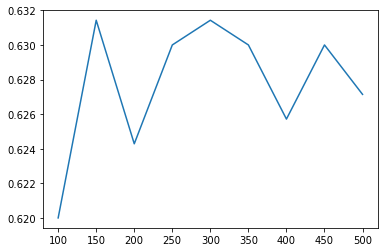

In [505]:
# plot average test score over the list of different amounts of trees
plt.plot(num_trees,bagging_results)
plt.show()

In [506]:
num_trees[np.argmax(bagging_results)]

150.0

In [507]:
opt_trees = num_trees[np.argmax(score)]

In [508]:
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=opt_trs,random_state=5).fit(X_train, y_train)

In [509]:
np.round(bagging_clf.score(X_test,y_test),3)

0.637

### <font color=red>&rarr; Accuracy Score for the bagging classifier with 150 trees = 0.637</font>

### _3.2 Random Forest_

For bagging and random forest, cross validate the number of trees you use (given by the n_estimators parameter).

In [510]:
rf_res=[]
for trs in num_trees:
    rfc = RandomForestClassifier(n_estimators=int(trs),max_features='sqrt',random_state=5).fit(X_train,y_train)
    cv_rfc = cross_validate(rfc, X_train, y_train, cv=5, scoring='accuracy')
    rf_res.append(cv_rfc['test_score'].mean())

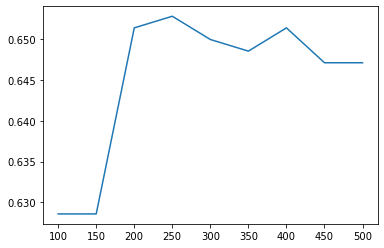

In [511]:
# plot average test score over the list of different amounts of trees
plt.plot(num_trees,rf_res)
plt.show()

In [512]:
num_trees[np.argmax(rf_res)]

250.0

In [513]:
opt_trs=int(num_trees[np.argmax(rf_res)])

In [514]:
rf_clf = RandomForestClassifier(n_estimators=opt_trs,max_features='sqrt',random_state=5).fit(X_train,y_train)

In [515]:
np.round(accuracy_score(rf_clf.predict(X_test),y_test),3)

0.647

### <font color=red>&rarr; Accuracy Score for the Random Forest classifier with 250 trees = 0.647</font>

### _3.3 Boosting_

For your boosting model, validate all of the parameters: n_estimators, learning_rate, and max_depth. 

In [516]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [517]:
parameters = {'learning_rate':[0.1,0.01], 'n_estimators':[300,400,500,600],'max_depth':[2,3,4,5]}

In [518]:
bmod = GradientBoostingClassifier(random_state=5)

In [519]:
boost_clf = GridSearchCV(bmod, parameters)
boost_clf.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=5),
             param_grid={'learning_rate': [0.1, 0.01],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [300, 400, 500, 600]})

In [520]:
boosting_df=pd.DataFrame.from_dict(boost_clf.cv_results_)
boosting_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.900415,0.007705,0.001766,0.000046,0.1,2,300,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.721429,0.750000,0.742857,0.714286,0.735714,0.732857,0.013248,4
1,1.199538,0.006994,0.002043,0.000045,0.1,2,400,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.714286,0.750000,0.742857,0.714286,0.764286,0.737143,0.019898,2
2,1.498915,0.004655,0.002314,0.000048,0.1,2,500,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.728571,0.735714,0.728571,0.721429,0.778571,0.738571,0.020504,1
3,1.826102,0.026356,0.002652,0.000127,0.1,2,600,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.728571,0.728571,0.735714,0.721429,0.771429,0.737143,0.017728,2
4,1.264653,0.001167,0.002181,0.000031,0.1,3,300,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.707143,0.685714,0.721429,0.671429,0.764286,0.710000,0.032135,6


In [521]:
boosting_df[boosting_df['mean_test_score']==boosting_df['mean_test_score'].max()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,1.498915,0.004655,0.002314,0.000048,0.1,2,500,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.728571,0.735714,0.728571,0.721429,0.778571,0.738571,0.020504,1


In [522]:
best_boosting_clf = GradientBoostingClassifier(random_state=5,learning_rate=0.1,n_estimators=500,max_depth=2).fit(X_train,y_train)

In [523]:
np.round(best_boosting_clf.score(X_test,y_test),3)

0.73

### <font color=red>&rarr; Accuracy Score for the boosting classifier with 500 trees, a learning rate of 0.1 and a tree depth of 2 = 0.73</font>

###  _3.4 K-nearest Neighbors_

For knn, cross validate the number of neighbors you use.

In [524]:
# Standardize the data
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [525]:
#Create a list to store the results
cvres_knn=[]
# Run through various values for k: use 5-fold cross validation, score with accuracy
for i in range(1,20):
    clf_knn = KNeighborsClassifier(n_neighbors=i)
    clf_cv_knn = cross_validate(clf_knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    #The test score gives an list of the accuracy on each of the five the test-folds
    cvres_knn.append(clf_cv_knn['test_score'].mean())

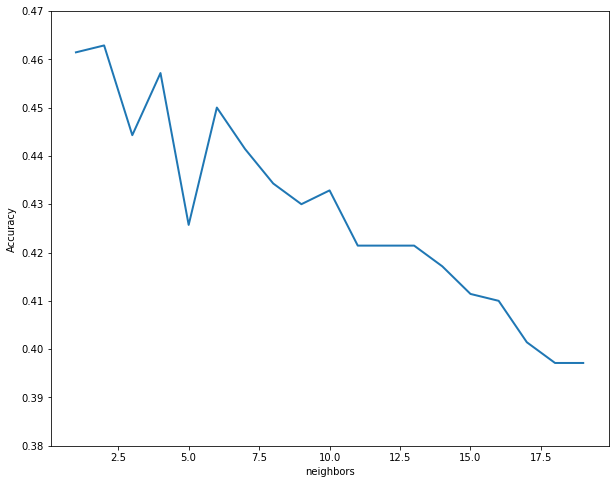

In [526]:
# plot the results for finding the optimal number of k
plt.figure(figsize=(10, 8))
plt.plot(list(range(1,20)),cvres_knn,linewidth=2)
plt.ylim(.38,.47)
plt.xlabel('neighbors')
plt.ylabel('Accuracy')
plt.show()

In [527]:
print(np.argmax(cvres_knn))
optimal_k = np.argmax(cvres_knn) + 1

1


max at k = 2

In [528]:
np.allclose(np.mean(X_train_scaled,axis=0),0),np.allclose(np.std(X_train_scaled,axis=0),1)

(True, True)

In [529]:
best_mod_knn = KNeighborsClassifier(n_neighbors=optimal_k)
best_knn_2=mod.fit(X_train,y_train)

In [530]:
np.round(accuracy_score(best_knn_2.predict(X_test),y_test),3)

0.47

### <font color=red>&rarr; Accuracy Score for KNN with 2 neighbors = 0.47</font>

### 4. Comment on which model gives the best results on the test set. For the best model, comment on feature importances (if relevant).

The boosting model performs the best with an accuracy score of 0.73.

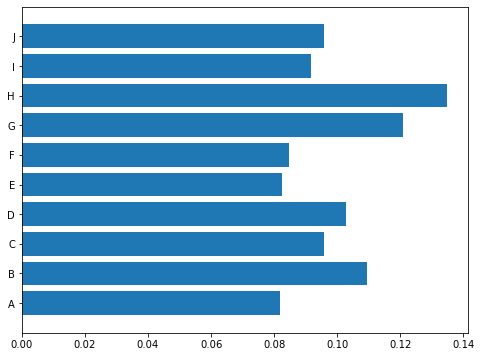

In [531]:
plt.figure(figsize=(8,6))
nfeat=X.shape[1]
plt.barh(np.arange(nfeat),best_boosting_clf.feature_importances_,align='center')
plt.yticks(np.arange(nfeat),list(X.columns))
plt.ylim(-1,nfeat)
plt.show()

In [532]:
print(best_boosting_clf.feature_importances_)

[0.08177854 0.10943942 0.09569795 0.10293385 0.0825274  0.08456866
 0.12078882 0.13488218 0.09155215 0.09583102]


The feature importance is not relevant in this case, because the features are all independent $N(0,1)$ observations, which were then classifier as class 0,1,2 based on the some of the 10 features in an observation. 